<p>We start this exercise by using a small dataset that is easy to visualize (Part 1), then we'll move to a high dimensional dataset (Part 2).</p>
<p>
    Part 1 example case consists of 2 network server statistics across several machines: the latency and throughput of each machine.
</p>
<p>
    Part 2 example case consists of several network server statistics across several machines.
</p>
<p>
This exercise will help us find possibly faulty (or very fast) machines.
</p>

## Imports

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import loadmat  # SciPy module to load .mat files
from scipy.stats import multivariate_normal

## Part 1: 

###  1.1 Load Example Dataset 

In [2]:
ex8data1 = loadmat('data/ex8data1.mat')
X_train = pd.DataFrame(ex8data1['X'], columns = ['latency', 'throughput'])
X_val =  pd.DataFrame(ex8data1['Xval'], columns = ['latency', 'throughput'])
y_val = pd.DataFrame(ex8data1['yval'], columns = ['state'])

In [3]:
X_train.head()

,latency,throughput
0,13.046815,14.741152
1,13.408520,13.763270
2,14.195915,15.853181
3,14.914701,16.174260
4,13.576700,14.042849


### 1.2 Data Visualization 


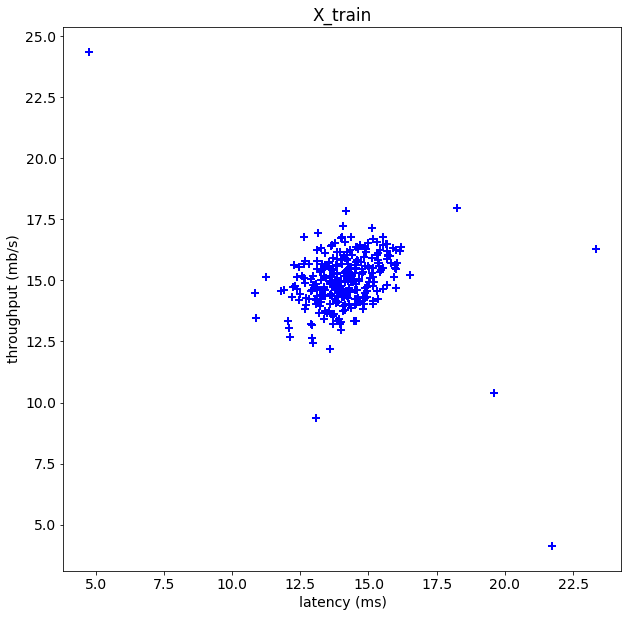

In [4]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 14

plt.plot(X_train['latency'], X_train['throughput'], 'b+', mew=2, ms=8)
plt.xlabel('latency (ms)')
plt.ylabel('throughput (mb/s)')
plt.title('X_train')
plt.show()

/home/whitenoise/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


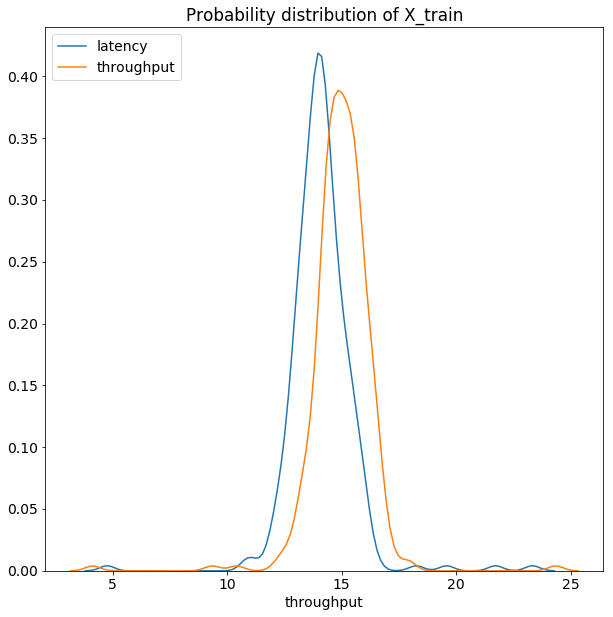

In [5]:
sns.distplot(X_train['latency'], hist=False, label='latency')
sns.distplot(X_train['throughput'], hist=False, label='throughput')
plt.title('Probability distribution of X_train')
plt.legend(loc='upper left')
plt.show()

### 1.3 Gaussian distribution estimation and threshold selection

In [6]:
def estimate_mu_sigma2(X):
    '''
    Estimate mean and variance of empirical values.
    Input: X as pandas dataframe of observations in which each column is a variable.
    Return values of estimated mu and covariance matrix.
    '''
    mu_hat = X.mean().values
    sigma2_hat = X.cov().values

    return mu_hat, sigma2_hat


def multivariateGaussian(X, mu, sigma2):
    p = multivariate_normal(mean=mu, cov=sigma2)
    
    return p.pdf(X)


In [7]:
def selectThreshold(yval, pval):
    from sklearn.metrics import f1_score
    bestEpsilon = 0
    bestF1 = 0
    F1 = 0
    stepsize = (max(pval) - min(pval)) / 1000
    epsilons = np.arange(min(pval), max(pval) + stepsize, stepsize)

    for epsilon in epsilons:
        pred = (pval < epsilon).astype(int)
        F1 = f1_score(yval, pred, average = "binary")
        if bestF1 < F1:
            bestF1 = F1
            bestEpsilon = epsilon
    
    return bestEpsilon, bestF1

In [8]:
mu, sigma2 = estimate_mu_sigma2(X_train)
p_train = multivariateGaussian(X_train, mu, sigma2)

p_val = multivariateGaussian(X_val, mu, sigma2) # proba of cross validation set
bestEpsilon, bestF1 = selectThreshold(y_val, p_val)

/home/whitenoise/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [9]:
print('The best threshold is:', bestEpsilon)
print('Its corresponding F1 score is:', np.round(bestF1, 4))

The best threshold is: 9.036240676156386e-05
Its corresponding F1 score is: 0.875


### 1.4 Outliers detection

In [10]:
# Extracting the outliers' indices from the training data
# The outliers are defined such that their gaussian prob is less than bestEpsilon
outliers_train = np.asarray(np.where((p_train < bestEpsilon)))[0]
outliers_train

array([300, 301, 303, 304, 305, 306])

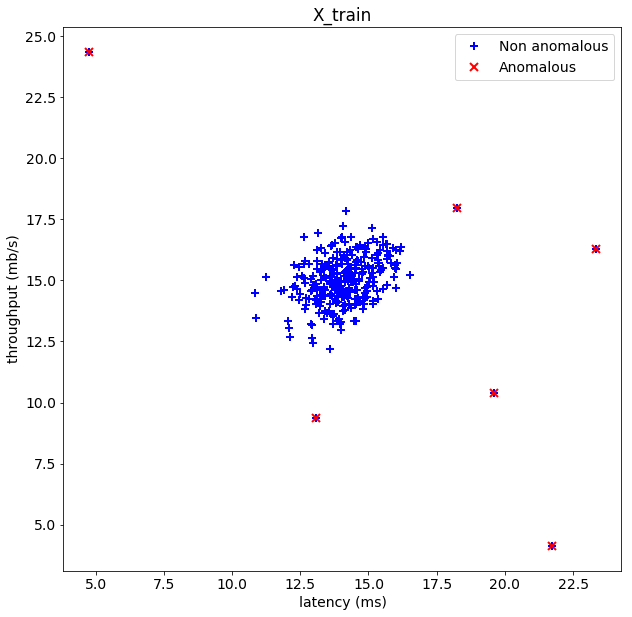

Total number of outliers is:  6


In [11]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 14

plt.plot(X_train['latency'], X_train['throughput'], 'b+', label='Non anomalous', mew=2, ms=8)
plt.plot(
    X_train.values[outliers_train, 0],
    X_train.values[outliers_train, 1],
    'rx',
    ms=8,
    mew=2,
    label='Anomalous')
plt.legend(loc='upper right')
plt.xlabel('latency (ms)')
plt.ylabel('throughput (mb/s)')
plt.title('X_train')
plt.show()
print('Total number of outliers is: ', len(outliers_train))

In [12]:
# Extracting the outliers' indices from the cross validation data
outliers_cv = np.asarray(np.where((p_val < bestEpsilon)))[0]
outliers_cv

array([300, 301, 302, 303, 304, 305, 306])

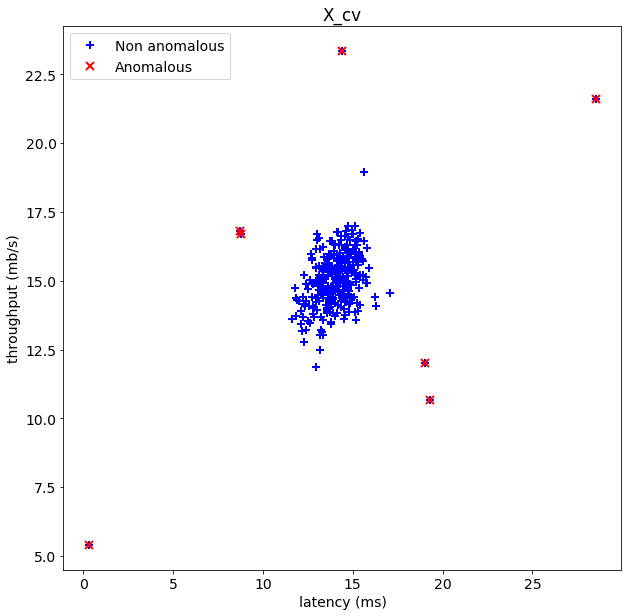

Total number of outliers is:  7


In [13]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 14

plt.plot(X_val['latency'], X_val['throughput'], 'b+', mew=2, ms=8, label='Non anomalous')
plt.plot(
    X_val.values[outliers_cv, 0],
    X_val.values[outliers_cv, 1],
    'rx',
    ms=8,
    mew=2,
    label='Anomalous')
plt.legend(loc='upper left')
plt.xlabel('latency (ms)')
plt.ylabel('throughput (mb/s)')
plt.title('X_cv')
plt.show()
print('Total number of outliers is: ', len(outliers_cv))

## Part 2: High dimensional data

### 1.1 Load Example Dataset

In [14]:
ex8data2 = loadmat('data/ex8data2.mat')
X_train = pd.DataFrame(ex8data2['X'])
X_val =  pd.DataFrame(ex8data2['Xval'])
y_val = pd.DataFrame(ex8data2['yval'])

In [15]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10
0,6.653114,13.689702,17.552845,-11.933497,-5.756409,15.435921,-12.136752,8.224123,-4.884024,5.349335,17.351372
1,-5.630542,-18.937667,18.644624,-6.155825,-25.988864,15.409553,-16.595516,9.454654,-2.877173,-6.009420,19.210636
2,9.721525,-9.982489,15.571434,-32.224266,-5.595799,24.321383,0.832774,10.794555,0.727575,10.392975,7.085995
3,-4.635766,-10.716040,20.356571,-9.002097,-4.920569,-4.261957,-1.305829,0.949980,-8.634107,0.198445,0.006771
4,-12.841044,-20.388313,9.491936,-7.038500,-9.921087,-3.716105,-9.384730,-2.325534,-13.518562,11.007029,14.003210


/home/whitenoise/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


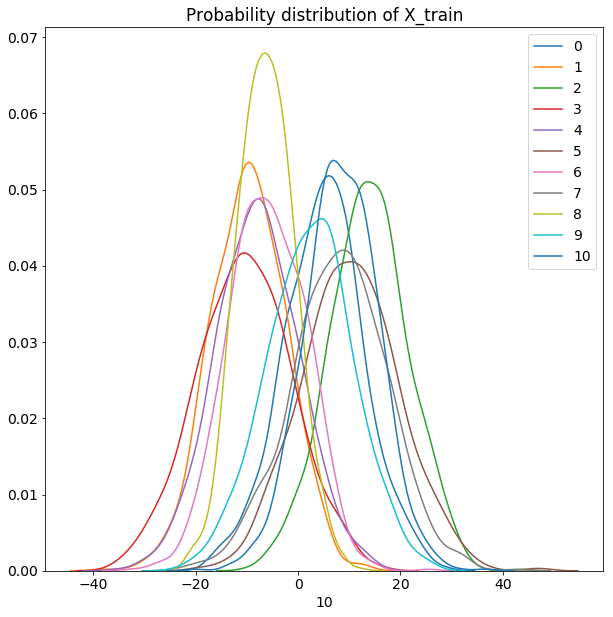

In [16]:
for column in X_train.columns:
    sns.distplot(X_train[column], hist=False, label=column)

plt.title('Probability distribution of X_train')
plt.legend(loc='upper right')
plt.show()

### 1.2 Gaussian distribution estimation and threshold selection

In [17]:
mu, sigma2 = estimate_mu_sigma2(X_train)
p_train = multivariateGaussian(X_train, mu, sigma2)

p_val = multivariateGaussian(X_val, mu, sigma2) # proba of cross validation set
bestEpsilon, bestF1 = selectThreshold(y_val, p_val)

/home/whitenoise/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
print('The best threshold is:', bestEpsilon)
print('Its corresponding F1 score is:', np.round(bestF1, 4))

The best threshold is: 1.7464996396712342e-18
Its corresponding F1 score is: 0.5517


### 1.3 Outliers detection

In [19]:
# Extracting the outliers' indices from the training data
outliers_train = np.asarray(np.where((p_train < bestEpsilon)))[0]
# Extracting the outliers' indices from the cross validation data
outliers_cv = np.asarray(np.where((p_val < bestEpsilon)))[0]
print('The total number of outliers in the training dataset is:', len(outliers_train))
print('The total number of outliers in the cv dataset is:', len(outliers_cv))

The total number of outliers in the training dataset is: 122
The total number of outliers in the cv dataset is: 19
